In [1]:
import wget
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn import get_config
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


c:\Users\adako\Desktop\python-projects\poetry-projects\mp-zoomcamp\homework_6\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
wget.download(url)

'car_fuel_efficiency.csv'

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

Preparing the dataset
Preparation: <br>

Fill missing values with zeros. <br>
Do train/validation/test split with 60%/20%/20% distribution.<br>
Use the train_test_split function and set the random_state parameter to 1.<br>
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.<br>

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.head().T

,0,1,2,3,4
engine_displacement,170,130,170,220,210
num_cylinders,3.0,5.0,NaN,4.0,1.0
horsepower,159.0,97.0,78.0,NaN,140.0
vehicle_weight,3413.433759,3149.664934,3079.038997,2542.392402,3460.87099
acceleration,17.7,17.8,15.1,20.2,14.4
model_year,2003,2007,2018,2009,2009
origin,Europe,USA,Europe,USA,Europe
fuel_type,Gasoline,Gasoline,Gasoline,Diesel,Gasoline
drivetrain,All-wheel drive,Front-wheel drive,Front-wheel drive,All-wheel drive,All-wheel drive
num_doors,0.0,0.0,0.0,2.0,2.0


In [4]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [5]:
df.fillna(0, inplace=True)

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [7]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [8]:
# implement the DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

Question 1 <br>
Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.<br>
<br>
Train a model with max_depth=1.<br>
Which feature is used for splitting the data?<br>

'vehicle_weight'
'model_year'
'origin'
'fuel_type'

In [9]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [10]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



Q1: vehicle_weight 

Question 2 <br>
Train a random forest regressor with these parameters:<br>

n_estimators=10<br>
random_state=1<br>
n_jobs=-1 (optional - to make training faster)<br>
What's the RMSE of this model on the validation data?<br>

0.045<br>
0.45<br>
4.5<br>
45.0<br>

In [11]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

np.float64(0.45997775573361477)

Q2: 0.45

Question 3 <br>
Now let's experiment with the n_estimators parameter<br>

Try different values of this parameter from 10 to 200 with step 10.<br>
Set random_state to 1.<br>
Evaluate the model on the validation dataset.<br>
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.<br>

10<br>
25<br>
80<br>
200<br>
If it doesn't stop improving, use the latest iteration number in your answer.<br>

In [13]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


In [14]:
scores

[(10, np.float64(0.4599777557336148)),
 (20, np.float64(0.45365906507838477)),
 (30, np.float64(0.45074274602790043)),
 (40, np.float64(0.4480067936304668)),
 (50, np.float64(0.44615128055079933)),
 (60, np.float64(0.4452658337959235)),
 (70, np.float64(0.44460982491385304)),
 (80, np.float64(0.4448931980390688)),
 (90, np.float64(0.4447241129599527)),
 (100, np.float64(0.4443178455925074)),
 (110, np.float64(0.44313500906534525)),
 (120, np.float64(0.4435285723898764)),
 (130, np.float64(0.44336417807088424)),
 (140, np.float64(0.4431801001185647)),
 (150, np.float64(0.442909875717056)),
 (160, np.float64(0.44262936541807835)),
 (170, np.float64(0.4427157028806334)),
 (180, np.float64(0.44236168144620613)),
 (190, np.float64(0.4425785032007027)),
 (200, np.float64(0.44260685365230207))]

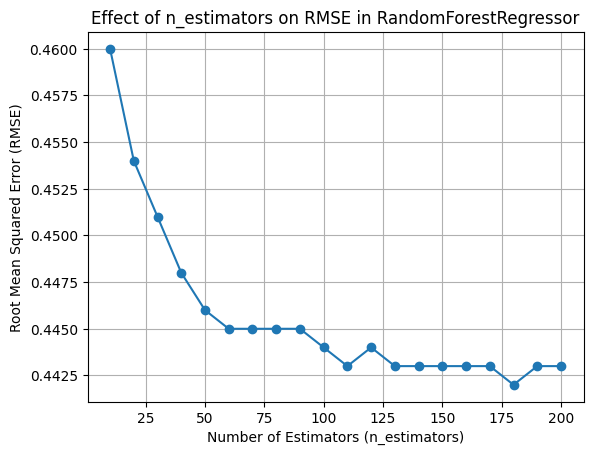

In [15]:
import matplotlib.pyplot as plt

# Plotting the number of estimators vs RMSE
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3), marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of n_estimators on RMSE in RandomForestRegressor")
plt.grid(True)
plt.show()

Q3:80

Question 4 <br>
Let's select the best max_depth:<br>

Try different values of max_depth: [10, 15, 20, 25]<br>
For each of these values,<br>
try different values of n_estimators from 10 till 200 (with step 10)<br>
calculate the mean RMSE<br>
Fix the random seed: random_state=1<br>
What's the best max_depth, using the mean RMSE?<br>

10<br>
15<br>
20<br>
25<br>

In [16]:
scores = []

for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestRegressor(n_estimators=0,
                               max_depth=d,
                               random_state=1, n_jobs=-1,
                               warm_start=True)

    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

100%|██████████| 4/4 [00:14<00:00,  3.58s/it]


In [17]:
scores

[(10, 10, np.float64(0.4518949820536878)),
 (10, 20, np.float64(0.44871930280196803)),
 (10, 30, np.float64(0.44622482434107064)),
 (10, 40, np.float64(0.44387694693462976)),
 (10, 50, np.float64(0.4426823297364458)),
 (10, 60, np.float64(0.44234995527764454)),
 (10, 70, np.float64(0.44179313949076043)),
 (10, 80, np.float64(0.44195965762740047)),
 (10, 90, np.float64(0.4419668100600304)),
 (10, 100, np.float64(0.44177674543409867)),
 (10, 110, np.float64(0.4408469921594633)),
 (10, 120, np.float64(0.44096669954703027)),
 (10, 130, np.float64(0.4408325522436666)),
 (10, 140, np.float64(0.4405115320481308)),
 (10, 150, np.float64(0.44012758195597496)),
 (10, 160, np.float64(0.43999675953472894)),
 (10, 170, np.float64(0.4401374684770232)),
 (10, 180, np.float64(0.4398370341427043)),
 (10, 190, np.float64(0.4399822938198718)),
 (10, 200, np.float64(0.4399424397367062)),
 (15, 10, np.float64(0.4571595736304553)),
 (15, 20, np.float64(0.45246236577205345)),
 (15, 30, np.float64(0.450477960

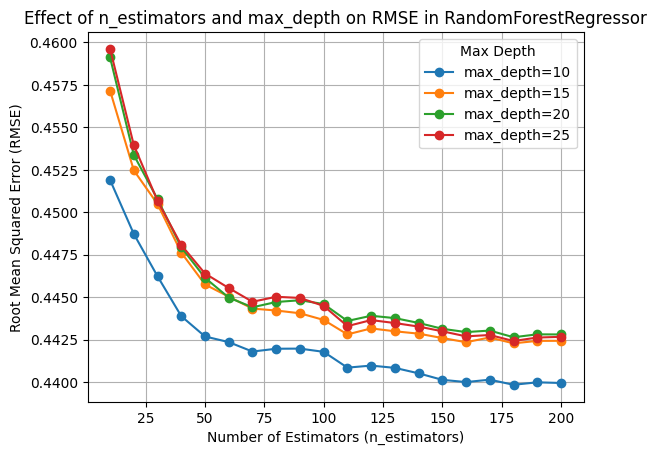

In [18]:
import matplotlib.pyplot as plt

for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'max_depth={d}', marker='o')

# Adding labels and title
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of n_estimators and max_depth on RMSE in RandomForestRegressor")
plt.legend(title="Max Depth")
plt.grid(True)
plt.show()

In [19]:
# Calculate the mean RMSE for each max_depth
mean_rmse_per_depth = df_scores.groupby('max_depth')['rmse'].mean()

# Find the max_depth with the lowest mean RMSE
best_max_depth = mean_rmse_per_depth.idxmin()
best_mean_rmse = mean_rmse_per_depth.min()

# Output the result
print(f"The best max_depth is {best_max_depth} with a mean RMSE of {best_mean_rmse:.3f}")

The best max_depth is 10 with a mean RMSE of 0.442


Question 4: 10

In [20]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, 
                           random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
rf.feature_importances_

array([1.14707165e-02, 3.81809750e-04, 3.11842085e-04, 3.26932342e-03,
       3.43693411e-04, 3.36671988e-04, 1.60402148e-02, 3.18229841e-03,
       2.35867094e-03, 1.59113306e-03, 4.76103046e-04, 5.20358083e-04,
       5.55151959e-04, 9.59162013e-01])

In [22]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,acceleration,0.011471
1,drivetrain=All-wheel drive,0.000382
2,drivetrain=Front-wheel drive,0.000312
3,engine_displacement,0.003269
4,fuel_type=Diesel,0.000344
5,fuel_type=Gasoline,0.000337
6,horsepower,0.016040
7,model_year,0.003182
8,num_cylinders,0.002359
9,num_doors,0.001591


In [23]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
13,vehicle_weight,0.959162
6,horsepower,0.016040
0,acceleration,0.011471
3,engine_displacement,0.003269
7,model_year,0.003182


Q 5: vehicle_weight

In [24]:
import re

In [25]:
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [26]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [27]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [28]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [29]:
scores['eta=0.3'] = parse_xgb_output(output)

In [30]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,1.81393,1.85444
1,5,0.51381,0.55664
2,10,0.37115,0.43896
3,15,0.34666,0.43362
4,20,0.33553,0.43376
5,25,0.32268,0.43683
6,30,0.31475,0.43752
7,35,0.30960,0.43784
8,40,0.30202,0.43968
9,45,0.29126,0.44024


In [31]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [32]:
scores['eta=0.1'] = parse_xgb_output(output)

In [33]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,2.28944,2.34561
1,5,1.41247,1.44988
2,10,0.91008,0.94062
3,15,0.63402,0.66672
4,20,0.48983,0.53064
5,25,0.41881,0.46891
6,30,0.38342,0.44289
7,35,0.36435,0.43250
8,40,0.35343,0.42746
9,45,0.34621,0.42595


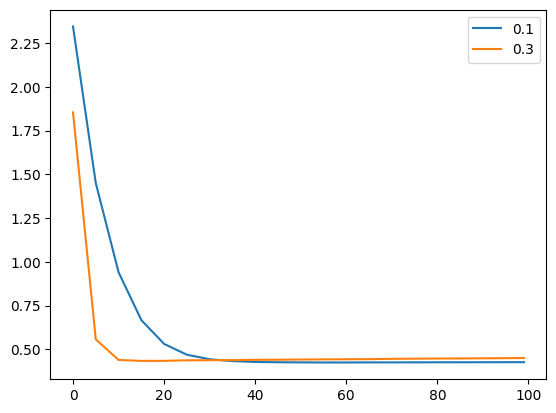

In [34]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()

Q6: 03